In [1]:
!pip install tensorflow

In [2]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [3]:
img=cv2.imread('img1.jpg')
img=cv2.resize(img,(720,480))
cv2.imshow('input', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def imshow(img):
    cv2.imshow('input', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Preprocessing a given image

In [5]:
def fixskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
      angle = -(90 + angle)
    else:
      angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [6]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image,5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [7]:
def constrast(image):
  imshow(img)
  lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  #Splitting the LAB image to different channels
  l, a, b = cv2.split(lab)

  #Applying CLAHE to L-channel
  clahe = cv2.createCLAHE(clipLimit=1.3, tileGridSize=(8,8))
  cl = clahe.apply(l)

  #Merge the CLAHE enhanced L-channel with the a and b channel
  limg = cv2.merge((cl,a,b))

  #Converting image from LAB Color model to RGB model
  final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

  return final

In [8]:
#img=constrast(img)
imshow(img)

In [9]:
img=get_grayscale(img)
imshow(img)

In [10]:
img=thresholding(img)
imshow(img)

In [11]:
#img=fixskew(img)
imshow(img)

In [12]:
test= img
#test = img_as_ubyte(test)
imshow(test)
img=test

In [13]:
horizontal_hist = img.shape[1]-np.sum(img,axis=1,keepdims=True)/255

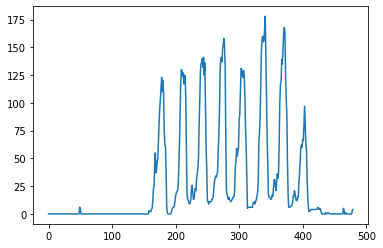

In [14]:
plt.plot(horizontal_hist)
plt.show()

In [15]:
pos=1
imges=[]
j=0
thresh=35
for i in range(len(horizontal_hist)):
  if pos==1 and horizontal_hist[i]<thresh:
    if j-8>0:
      up=j-8
    else:
      up=j
    if i+8<len(img):
      dn=i+8
    else:
      dn=i
    imges.append(img[up:dn])
    pos=0
    j=i
    continue
  if pos==1 and horizontal_hist[i]>=thresh:
    continue
  if pos==0 and horizontal_hist[i]<thresh:
    continue
  if pos==0 and horizontal_hist[i]>=thresh:
    j=i
    pos=1
    continue
print(len(imges))

10


In [16]:
count=0
for i in imges:
  print(count)
  count+=1
  imshow(i)

0
1
2
3
4
5
6
7
8
9


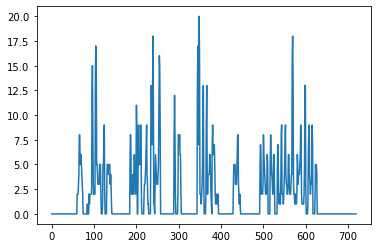

(1, 720) (35, 720)


In [17]:
vh=imges[1].shape[0] - np.sum(imges[1],axis=0,keepdims=True)/255
plt.plot(vh[0])
plt.show()
print(vh.shape,imges[1].shape)

In [18]:
pos=0
thresh=10
t_v=5
doc=[]
for k in range(len(imges)):
  words=[]
  vh=imges[k].shape[0] - np.sum(imges[k],axis=0,keepdims=True)/255
  vh=vh[0]
  #plt.plot(vh)
  #plt.show()
  i=0
  while i<720:
    if pos==0 and vh[i]>=t_v:
      pos=1
      j=i
      i+=1
      continue
    if pos==0 and vh[i]<t_v:
      i+=1
      continue
    if pos==1 and vh[i]>=t_v:
      i+=1
      continue
    if pos==1 and vh[i]<t_v:
      sm=sum(vh[i:i+thresh])
      if sm<t_v:
        test=imges[k]
        test=test[:,j-2:i]
        words.append(test)
        i+=thresh
        pos=0
        j=i
      i+=1
  doc.append(words)

In [19]:
for i in doc:
    for j in i:
        imshow(j)

In [20]:
from keras.models import load_model

In [22]:
model=load_model('lstm-model-after-3rd-session.h5')

ValueError: bad marshal data (unknown type code)

In [ ]:
for i in doc:
  for j in i:
    vertical_word=j.shape[0] - np.sum(j,axis=0,keepdims=True)/255
    imshow(j)
    plt.plot(vertical_word[0])
    plt.show()

In [ ]:
vertical_word=doc[1][2].shape[0] - np.sum(doc[1][2],axis=0,keepdims=True)/255
print(vertical_word[0])

[ 0.  0.  6.  8.  6.  2.  2.  2.  3.  4.  2.  4.  6.  4.  3.  2.  5. 11.
  8.  0.  0.  6.  9.  5.  5.  5.  5.  9.  6.  1.  0.  0.  0.  0.  0.  2.
  3.  3.  4.  5.  7.  9.  4.  3.  1.  1.  0.  0.  0.  0.  0.  9. 13. 10.
  7. 11. 18. 11.  1.  1.  0.  3.  6.  5.  4.  3.  3.  3.  4.  5. 11. 16.
 15.  9.]


In [ ]:
final=[]
for i in doc:
  temp=[]
  for j in i:
    

In [ ]:
vertical_hist=[]
for i in imges:
  test=i
  from skimage import img_as_ubyte
  vertical_hist.append(test.shape[0] - np.sum(test,axis=0,keepdims=True)/255)

  

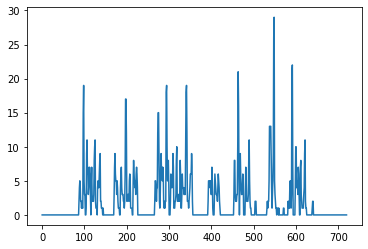

In [ ]:
plt.plot(vertical_hist[2][0])
plt.autoscale()
plt.show()

In [ ]:
pos=0
thresh=10
t_v=5
words=[]

for t in range(len(vertical_hist)):
  k=vertical_hist[t][0]
  i=0
  while i<len(k):
    if pos==0 and k[i]>=t_v:
      pos=1
      j=i
      i+=1
      continue
    if pos==0 and k[i]<t_v:
      i+=1
      continue
    if pos==1 and k[i]>=t_v:
      i+=1
      continue
    if pos==1 and k[i]<t_v:
      sm=sum(k[i:i+thresh])
      if sm<t_v:
        test=imges[t]
        words.append(test[j:i])
        while i<len(k) and k[i]<t_v:
          i+=1
        pos=1
        j=i
      i+=1

print(len(words))

70


In [ ]:
print(words)

[array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8), array([], shape=(0, 720), dtype=uint8),

In [ ]:
imshow(imges[0])